In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [123]:
chall_df = pd.read_csv('Data/Challenger_Ranked_Games.csv')
gm_df = pd.read_csv('Data/GrandMaster_Ranked_Games.csv')
m_df = pd.read_csv('Data/Master_Ranked_Games.csv')
chall_df_clean = chall_df[chall_df['gameDuraton'] > 600].copy()
chall_df_clean['blueVisionScore'] = chall_df_clean['blueWardPlaced'] + chall_df_clean['blueWardkills']
chall_df_clean['redVisionScore'] = chall_df_clean['redWardPlaced'] + chall_df_clean['redWardkills']

In [124]:
chall_df_clean.head()

gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0  4247263043         1323         0               1               0   
1  4247155821         1317         1               0               0   
2  4243963257          932         0               0               0   
3  4241678498         2098         0               0               0   
4  4241538868         2344         1               1               1   

   blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
0               0                0                   0                0   
1               0                1                   0                2   
2               0                0                   0                0   
3               1                1                   0                1   
4               1                1                   1                2   

   blueBaronKills  ...  redTotalGold  redTotalMinionKills  redTotalLevel  \
0               0  ...         49832                  533             64   
1               0  ...         37136                  571             59   
2               0  ...         35364                  400             50   
3               1  ...         70528                  832             84   
4               2  ...         74596                  794             85   

   redAvgLevel  redJungleMinionKills  redKillingSpree  redTotalHeal  \
0         12.8                   138                8         38711   
1         11.8                   134                3         24829   
2         10.0                    89                5         12589   
3         16.8                   205                9         65312   
4         17.0                   227                7         86431   

   redObjectDamageDealt  blueVisionScore  redVisionScore  
0                 60463               51              67  
1                 14105               75              64  
2                 45201               35              49  
3                 88202              168             152  
4                 64141              149             143  

[5 rows x 52 columns]

In [4]:
chall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [5]:
gm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65896 entries, 0 to 65895
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   65896 non-null  int64  
 1   gameDuraton              65896 non-null  int64  
 2   blueWins                 65896 non-null  int64  
 3   blueFirstBlood           65896 non-null  int64  
 4   blueFirstTower           65896 non-null  int64  
 5   blueFirstBaron           65896 non-null  int64  
 6   blueFirstDragon          65896 non-null  int64  
 7   blueFirstInhibitor       65896 non-null  int64  
 8   blueDragonKills          65896 non-null  int64  
 9   blueBaronKills           65896 non-null  int64  
 10  blueTowerKills           65896 non-null  int64  
 11  blueInhibitorKills       65896 non-null  int64  
 12  blueWardPlaced           65896 non-null  int64  
 13  blueWardkills            65896 non-null  int64  
 14  blueKills             

In [6]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   107125 non-null  int64  
 1   gameDuraton              107125 non-null  int64  
 2   blueWins                 107125 non-null  int64  
 3   blueFirstBlood           107125 non-null  int64  
 4   blueFirstTower           107125 non-null  int64  
 5   blueFirstBaron           107125 non-null  int64  
 6   blueFirstDragon          107125 non-null  int64  
 7   blueFirstInhibitor       107125 non-null  int64  
 8   blueDragonKills          107125 non-null  int64  
 9   blueBaronKills           107125 non-null  int64  
 10  blueTowerKills           107125 non-null  int64  
 11  blueInhibitorKills       107125 non-null  int64  
 12  blueWardPlaced           107125 non-null  int64  
 13  blueWardkills            107125 non-null  int64  
 14  blue

In [7]:
m_df_blue = m_df.iloc[:,2:26]
m_df_red = m_df.iloc[:,26:]

In [8]:
m_df_blue.info()
m_df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   blueWins                 107125 non-null  int64  
 1   blueFirstBlood           107125 non-null  int64  
 2   blueFirstTower           107125 non-null  int64  
 3   blueFirstBaron           107125 non-null  int64  
 4   blueFirstDragon          107125 non-null  int64  
 5   blueFirstInhibitor       107125 non-null  int64  
 6   blueDragonKills          107125 non-null  int64  
 7   blueBaronKills           107125 non-null  int64  
 8   blueTowerKills           107125 non-null  int64  
 9   blueInhibitorKills       107125 non-null  int64  
 10  blueWardPlaced           107125 non-null  int64  
 11  blueWardkills            107125 non-null  int64  
 12  blueKills                107125 non-null  int64  
 13  blueDeath                107125 non-null  int64  
 14  blue

In [9]:
m_df_blue.corr()

blueWins  blueFirstBlood  blueFirstTower  \
blueWins                 1.000000        0.208979        0.472211   
blueFirstBlood           0.208979        1.000000        0.220634   
blueFirstTower           0.472211        0.220634        1.000000   
blueFirstBaron           0.369585        0.050738        0.145523   
blueFirstDragon          0.276402        0.142845        0.224847   
blueFirstInhibitor       0.668425        0.157705        0.397007   
blueDragonKills          0.455406        0.136477        0.298754   
blueBaronKills           0.355497        0.043951        0.124413   
blueTowerKills           0.723008        0.190511        0.496109   
blueInhibitorKills       0.583411        0.124774        0.323699   
blueWardPlaced           0.023395        0.011472        0.063261   
blueWardkills            0.062683        0.018074        0.089292   
blueKills                0.411674        0.133469        0.263391   
blueDeath               -0.416598       -0.131250       -0.224527   
blueAssist               0.328040        0.084498        0.164791   
blueChampionDamageDealt  0.153082        0.041193        0.115336   
blueTotalGold            0.248268        0.078277        0.198912   
blueTotalMinionKills     0.067803        0.039860        0.118411   
blueTotalLevel           0.192247        0.051018        0.153919   
blueAvgLevel             0.192247        0.051018        0.153919   
blueJungleMinionKills    0.201437        0.056709        0.192193   
blueKillingSpree         0.387202        0.121124        0.255915   
blueTotalHeal            0.192846        0.034819        0.102505   
blueObjectDamageDealt    0.527904        0.144270        0.386796   

                         blueFirstBaron  blueFirstDragon  blueFirstInhibitor  \
blueWins                       0.369585         0.276402            0.668425   
blueFirstBlood                 0.050738         0.142845            0.157705   
blueFirstTower                 0.145523         0.224847            0.397007   
blueFirstBaron                 1.000000         0.132850            0.410164   
blueFirstDragon                0.132850         1.000000            0.186230   
blueFirstInhibitor             0.410164         0.186230            1.000000   
blueDragonKills                0.441767         0.586899            0.405637   
blueBaronKills                 0.886130         0.123915            0.385164   
blueTowerKills                 0.528847         0.300609            0.782831   
blueInhibitorKills             0.414582         0.141852            0.785919   
blueWardPlaced                 0.410335         0.174994            0.116100   
blueWardkills                  0.404725         0.133331            0.145313   
blueKills                      0.302841         0.075192            0.449645   
blueDeath                     -0.021204        -0.206693           -0.170949   
blueAssist                     0.231409        -0.045051            0.389297   
blueChampionDamageDealt        0.312299         0.002572            0.297246   
blueTotalGold                  0.423081         0.080543            0.376793   
blueTotalMinionKills           0.401575         0.190257            0.156892   
blueTotalLevel                 0.385228         0.044485            0.321487   
blueAvgLevel                   0.385228         0.044485            0.321487   
blueJungleMinionKills          0.484125         0.268259            0.260849   
blueKillingSpree               0.270866         0.058621            0.415279   
blueTotalHeal                  0.380609         0.088643            0.284947   
blueObjectDamageDealt          0.651391         0.356591            0.557738   

                         blueDragonKills  blueBaronKills  blueTowerKills  \
blueWins                        0.455406        0.355497        0.723008   
blueFirstBlood                  0.136477        0.043951        0.190511   
blueFirstTower                  0.298754        0.124413        0.4961

In [10]:
m_df_red.corr()

redWins  redFirstBlood  redFirstTower  redFirstBaron  \
redWins                 1.000000       0.209282       0.471455       0.396186   
redFirstBlood           0.209282       1.000000       0.221325       0.055745   
redFirstTower           0.471455       0.221325       1.000000       0.139931   
redFirstBaron           0.396186       0.055745       0.139931       1.000000   
redFirstDragon          0.281737       0.143543       0.218930       0.164575   
redFirstInhibitor       0.655057       0.157353       0.387465       0.424891   
redDragonKills          0.470271       0.137645       0.273799       0.478562   
redBaronKills           0.381315       0.050123       0.115574       0.878913   
redTowerKills           0.728810       0.191544       0.474712       0.551792   
redInhibitorKills       0.578057       0.129137       0.322710       0.420620   
redWardPlaced           0.064839       0.018999       0.025671       0.428858   
redWardkills            0.105124       0.029235       0.051183       0.429778   
redKills                0.418711       0.140157       0.268621       0.317789   
redDeath               -0.409883      -0.124628      -0.219464      -0.038833   
redAssist               0.332346       0.093045       0.171968       0.240586   
redChampionDamageDealt  0.173848       0.049901       0.114934       0.319876   
redTotalGold            0.275944       0.089735       0.191292       0.436378   
redTotalMinionKills     0.109334       0.046416       0.088955       0.423805   
redTotalLevel           0.221730       0.067637       0.152229       0.399478   
redAvgLevel             0.221730       0.067637       0.152229       0.399478   
redJungleMinionKills    0.247116       0.063948       0.165999       0.507313   
redKillingSpree         0.397022       0.133657       0.265146       0.280960   
redTotalHeal            0.220708       0.041991       0.090783       0.392133   
redObjectDamageDealt    0.557780       0.149507       0.358227       0.672978   

                        redFirstDragon  redFirstInhibitor  redDragonKills  \
redWins                       0.281737           0.655057        0.470271   
redFirstBlood                 0.143543           0.157353        0.137645   
redFirstTower                 0.218930           0.387465        0.273799   
redFirstBaron                 0.164575           0.424891        0.478562   
redFirstDragon                1.000000           0.181271        0.602207   
redFirstInhibitor             0.181271           1.000000        0.398818   
redDragonKills                0.602207           0.398818        1.000000   
redBaronKills                 0.152402           0.396883        0.513207   
redTowerKills                 0.310868           0.778417        0.632133   
redInhibitorKills             0.132150           0.783726        0.398732   
redWardPlaced                 0.234155           0.126312        0.577875   
redWardkills                  0.201925           0.158440        0.558887   
redKills                      0.065105           0.451792        0.337052   
redDeath                     -0.229777          -0.154274       -0.138902   
redAssist                    -0.056650           0.391698        0.181884   
redChampionDamageDealt        0.004068           0.309457        0.336974   
redTotalGold                  0.093746           0.390088        0.472321   
redTotalMinionKills           0.251900           0.171756        0.596538   
redTotalLevel                 0.060856           0.338380        0.408786   
redAvgLevel                   0.060856           0.338380        0.408786   
redJungleMinionKills          0.330749           0.272713        0.710578   
redKillingSpree               0.050572           0.422950        0.292832   
redTotalHeal                  0.105384           0.295399        0.463035   
redObjectDamageDealt          0.383447           0.562035        0.819190   

                        redBaronKills  redTowerKills  redInhibitorKills  

In [11]:
vision_df = m_df[['gameId','gameDuraton','blueWins','redWins','blueWardPlaced','redWardPlaced']]

In [12]:
vision_df_blue_wins = vision_df[vision_df['blueWins']> 0]
vision_df_blue_losses = vision_df[vision_df['blueWins'] == 0]

In [13]:
vision_df_blue_wins.reset_index(inplace=True)
vision_df_blue_losses.reset_index(inplace=True)

In [14]:
vision_df_blue_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53041 entries, 0 to 53040
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   index           53041 non-null  int64
 1   gameId          53041 non-null  int64
 2   gameDuraton     53041 non-null  int64
 3   blueWins        53041 non-null  int64
 4   redWins         53041 non-null  int64
 5   blueWardPlaced  53041 non-null  int64
 6   redWardPlaced   53041 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


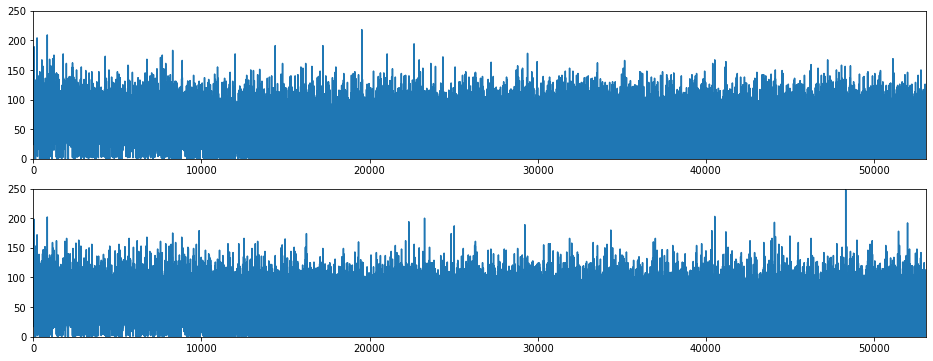

In [15]:
x = np.linspace(0, 5000, num = 1000)

fig, axs = plt.subplots(2, figsize = (16,6))
axs[0].plot(vision_df_blue_wins[['blueWardPlaced']])
axs[0].set_xlim(0, 53100)
axs[0].set_ylim(0,250)


axs[1].plot(vision_df_blue_wins[['redWardPlaced']])
axs[1].set_xlim(0, 53100)
axs[1].set_ylim(0,250)

plt.show();

In [16]:
p_value = stats.mannwhitneyu(vision_df_blue_wins[['blueWardPlaced']],vision_df_blue_wins[['redWardPlaced']], alternative="greater")

In [17]:
p_value

MannwhitneyuResult(statistic=1483605127.5, pvalue=5.001379862078499e-54)

In [18]:
from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from glm.glm import GLM
from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [19]:
model = sm.OLS(vision_df_blue_wins[['blueWins']],vision_df_blue_wins[['blueWardPlaced']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                          1.724e+05
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        12:21:16   Log-Likelihood:                         -36883.
No. Observations:               53041   AIC:                                  7.377e+04
Df Residuals:                   53040   BIC:                                  7.378e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [20]:
x = vision_df_blue_wins[['blueWardPlaced','redWardPlaced','gameDuraton']]
# x = x[0:1000]

In [21]:
y = vision_df_blue_wins['blueWins']
# y = y[0:1000]

In [22]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.484e+05
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        12:21:16   Log-Likelihood:                         -3355.6
No. Observations:               53041   AIC:                                      6717.
Df Residuals:                   53038   BIC:                                      6744.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [23]:
y_predict = results.predict(x)
y_predict

0        0.964464
1        0.622236
2        0.635041
3        1.086155
4        0.924009
           ...   
53036    1.317018
53037    1.138370
53038    0.996554
53039    1.418470
53040    0.758077
Length: 53041, dtype: float64

In [24]:
residuals = y_predict - y

In [25]:
residuals

0       -0.035536
1       -0.377764
2       -0.364959
3        0.086155
4       -0.075991
           ...   
53036    0.317018
53037    0.138370
53038   -0.003446
53039    0.418470
53040   -0.241923
Length: 53041, dtype: float64

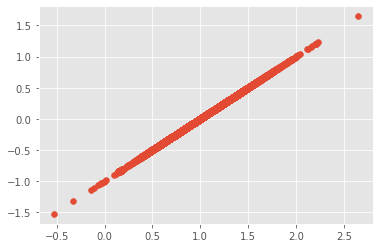

In [26]:
plt.scatter(y_predict,residuals);

In [27]:
new_df = m_df[m_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

In [28]:
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','redWardkills','redWardPlaced','gameDuraton','blueKills','redKills']].values)
x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]

In [29]:
y = new_df['blueTotalGold']
# y = y[0:1000]

In [30]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.222e+05
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:16   Log-Likelihood:            -1.0007e+06
No. Observations:              103221   AIC:                         2.001e+06
Df Residuals:                  103216   BIC:                         2.001e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2333.3940     54.585     42.748      0.0

In [31]:
y_predict = results.predict(x)
y_predict

array([34909.2431412 , 31747.58121476, 56054.44813726, ...,
       60704.32282614, 49078.85055725, 36047.4543736 ])

In [32]:
residuals = y_predict - y

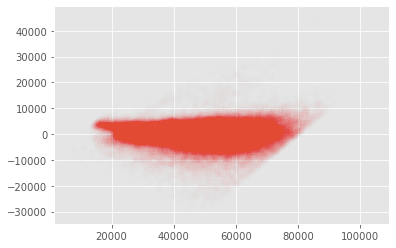

In [33]:
plt.scatter(y_predict,residuals, alpha=0.005);

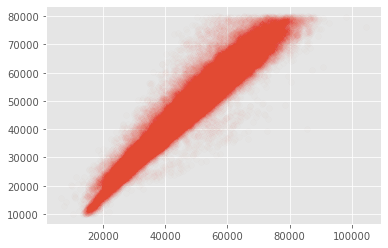

In [34]:
plt.scatter(y_predict,y,alpha=0.01)

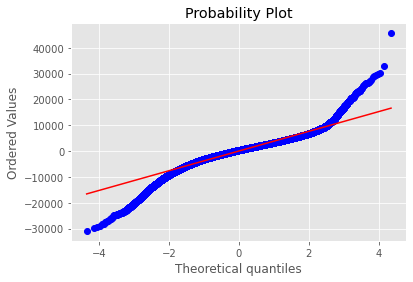

In [35]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [36]:
new_df = gm_df[gm_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

In [37]:
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','redWardkills','redWardPlaced','gameDuraton','blueKills','redKills']].values)
x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]

In [38]:
y = new_df['blueTotalGold']
# y = y[0:1000]

In [39]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.969e+05
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:17   Log-Likelihood:            -6.1503e+05
No. Observations:               63512   AIC:                         1.230e+06
Df Residuals:                   63507   BIC:                         1.230e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1643.2626     70.509     23.306      0.0

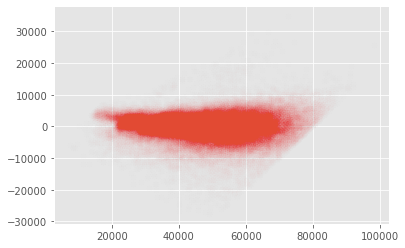

In [40]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
plt.scatter(y_predict,residuals, alpha=0.005);

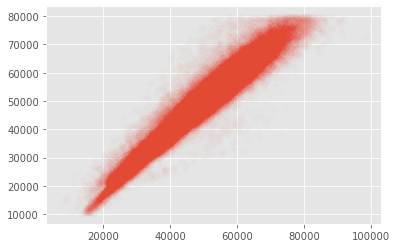

In [41]:
plt.scatter(y_predict,y,alpha=0.01);

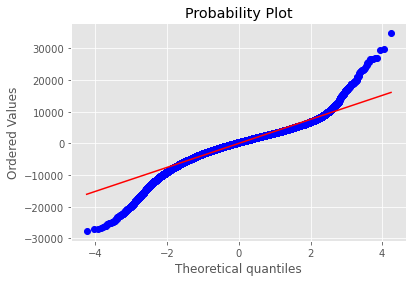

In [42]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [43]:
new_df = chall_df[chall_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

NormaltestResult(statistic=79.13765986172186, pvalue=6.5384605184819944e-18)


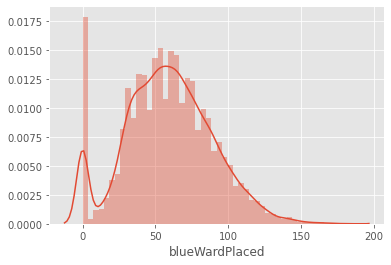

In [44]:
print(stats.normaltest(new_df['blueWardPlaced']))
sns.distplot(new_df['blueWardPlaced']);

NormaltestResult(statistic=1447.7135714096555, pvalue=0.0)


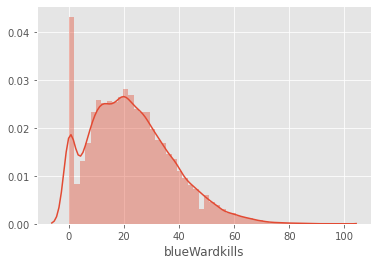

In [45]:
print(stats.normaltest(new_df['blueWardkills']))
sns.distplot(new_df['blueWardkills']);

NormaltestResult(statistic=1550.4767935504522, pvalue=0.0)


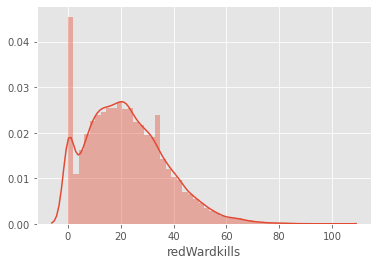

In [46]:
print(stats.normaltest(new_df['redWardkills']))
sns.distplot(new_df['redWardkills']);

NormaltestResult(statistic=118.72600878520429, pvalue=1.6556737492694012e-26)


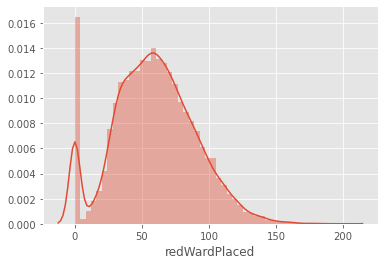

In [47]:
print(stats.normaltest(new_df['redWardPlaced']))
sns.distplot(new_df['redWardPlaced']);

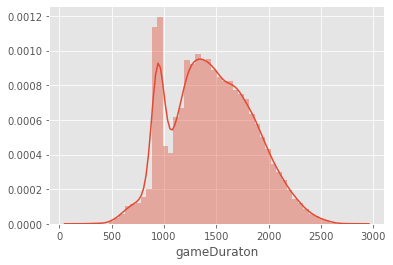

In [48]:
sns.distplot(new_df['gameDuraton']);

NormaltestResult(statistic=756.3500071382591, pvalue=5.763453003627245e-165)


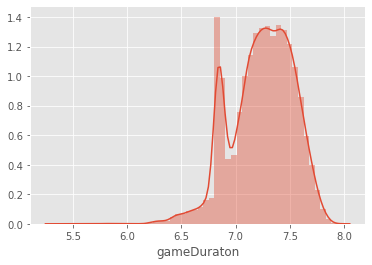

In [49]:
print(stats.normaltest(new_df['gameDuraton']))
sns.distplot(np.log(new_df['gameDuraton']));

NormaltestResult(statistic=1219.3556130925274, pvalue=1.6607064716406148e-265)


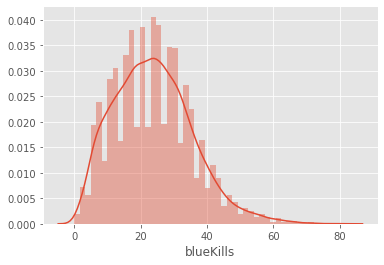

In [50]:
print(stats.normaltest(new_df['blueKills']))
sns.distplot(new_df['blueKills']);

NormaltestResult(statistic=1676.7585022092933, pvalue=0.0)


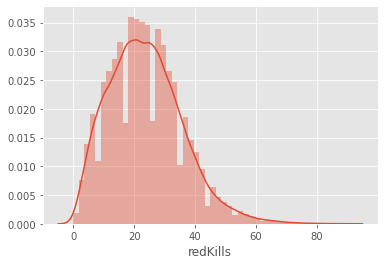

In [51]:
print(stats.normaltest(new_df['redKills']))
sns.distplot(new_df['redKills']);

NormaltestResult(statistic=989.4204615306272, pvalue=1.412786829287968e-215)


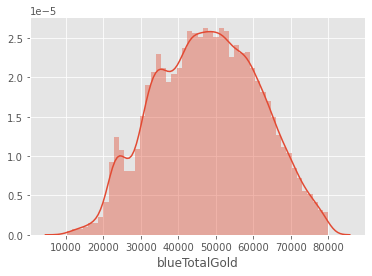

In [52]:
print(stats.normaltest(new_df['blueTotalGold']))
sns.distplot(new_df['blueTotalGold']);

In [152]:
columns = ['blueTotalGold','blueVisionScore','blueKills']
chall_df_clean['logblueTotalGold'] = chall_df_clean['blueTotalGold'].apply((lambda row: np.log(
            row) if row != 0 else 0))
# chall_df_clean.mean()
drop_vision_df = chall_df_clean[chall_df_clean['blueVisionScore'] > 0]
# sns.pairplot(drop_vision_df[0:26])

In [153]:
new_df['blueVisionScore'] = new_df['blueWardPlaced'] + new_df['blueWardkills']
columns = ['blueWardPlaced','blueKills','blueTotalHeal','blueObjectDamageDealt']
x = sm.tools.tools.add_constant(new_df[columns].values)
y = new_df['blueTotalGold']
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 4.392e+04
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:41:25   Log-Likelihood:            -2.5819e+05
No. Observations:               26014   AIC:                         5.164e+05
Df Residuals:                   26009   BIC:                         5.164e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.489e+04     89.992    165.473      0.0

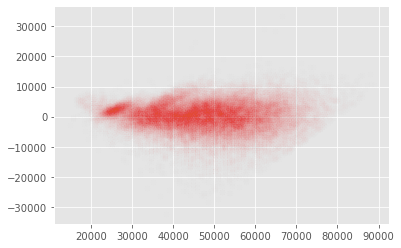

In [116]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
plt.scatter(y_predict,residuals, alpha=0.005);

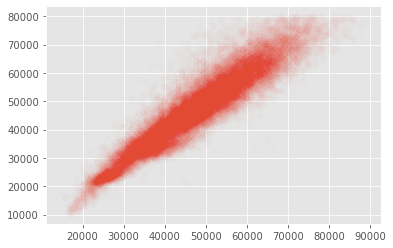

In [117]:
plt.scatter(y_predict,y,alpha=0.01);

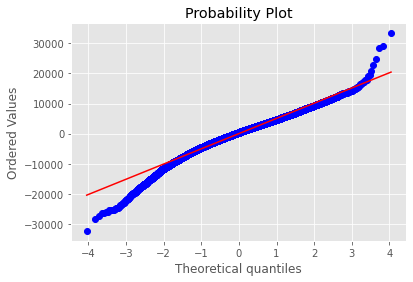

In [118]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [119]:
x = new_df[columns]

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

p_values = pd.DataFrame(results.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
  
vif_data.head()

feature       VIF  p_values
0  blueVisionScore  2.952799       0.0
1        blueKills  2.952799       0.0


    1. Event A1. It rains on Marie's wedding.
    2. Event A2. It does not rain on Marie's wedding.
    3. Event B. The weatherman predicts rain.

In terms of probabilities, we know the following:

    1. P( A1 ) = 5/365 =0.0136985 [It rains 5 days out of the year.]
    2. P( A2 ) = 360/365 = 0.9863014 [It does not rain 360 days out of the year.]
    3. P( B | A1 ) = 0.9 [When it rains, the weatherman predicts rain 90% of the time.]
    4. P( B | A2 ) = 0.1 [When it does not rain, the weatherman predicts rain 10% of the time.]

We want to know P( A1 | B ), the probability it will rain on the day of Marie's wedding, given a forecast for rain by the weatherman. The answer can be determined from Bayes' theorem, as shown below.

1. P( A1 | B ) =   	P( A1 ) P( B | A1 ) P( A1 ) P( B | A1 ) + P( A2 ) P( B | A2 )

2. P( A1 | B ) = 	(0.014)(0.9) [ (0.014)(0.9) + (0.986)(0.1) ]

3. P( A1 | B ) = 	0.111

Note the somewhat unintuitive result. Even when the weatherman predicts rain, it rains only about 11% of the time. Despite the weatherman's gloomy prediction, there is a good chance that Marie will not get rained on at her wedding. 

In [59]:
blue_gold_greater = chall_df[chall_df['blueTotalGold'] > chall_df['redTotalGold']]

In [60]:
blue_wins = chall_df[chall_df['blueWins'] > 0]
len(blue_wins['blueWins'])

13454

In [61]:
print(len(blue_wins[blue_wins['blueTotalGold'] > blue_wins['redTotalGold']]))
print(26904 - 13152)
print(13152 / 26904)
print(13152/13454)
print(13454 - 13152)
print( (0.489*0.978) / ((0.489 * 0.978) + (0.511 * 0.022) ) )
print(0.95746199999999/0.957923999999)

13152
13752
0.4888492417484389
0.9775531440463803
302
0.9770329571548815
0.9995177070425102


## So, I want to see if I can make this form of test work for my data.\

1. Event A1: Blue wins the match.
2. Event A2: Blue does not win the match.
3. Event B: Blue has more gold than red.

1. P(A1): (based on sample) 13152/26904 = 0.489
2. P(A2): (based on sample) 13752/26904 = 0.511
3. P(B | A1): (based on sample) 13152/13454 =0.978
4. P(B | A2): (based on sample) 302/13454 = 0.022

So...

1. P(A1 | B): P(A1)P(B|A1) / P(A1)P(B|A1) + P(A2)P(B|A2)
2. P(A1 | B): (0.489)(0.978) / ((0.489)(0.978) + (0.511)(0.022))
3. P(A1 | B): 0.977

In [62]:
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b
 
# P(A)
p_a = 0.489
# P(B|A)
p_b_given_a = 0.978
# P(B|not A)
p_b_given_not_a = 0.022
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 97.703%


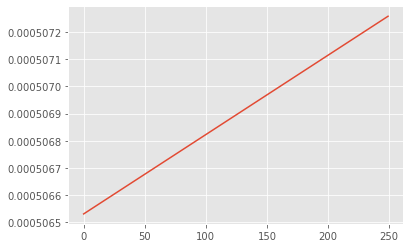

In [63]:
x = np.linspace(-3,3,num=250)
gold_dist = stats.norm(np.mean(chall_df_clean['blueTotalGold']), np.std(chall_df_clean['blueTotalGold']))
plt.plot(gold_dist.cdf(x));

In [64]:
bootstrap_sample_medians = []
for i in range(10000):
    bootstrap = np.random.choice(chall_df_clean['blueWardPlaced'], size=len(chall_df_clean['blueWardPlaced']), replace=True)
    bootstrap_median = np.median(bootstrap)
    bootstrap_sample_medians.append(bootstrap_median)
bootstrap_sample_medians

[59.0,
 58.0,
 58.0,
 58.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,

In [65]:
bootstrap_sample_means = []
for i in range(10000):
    bootstrap = np.random.choice(chall_df_clean['blueTotalGold'], size=len(chall_df_clean['blueTotalGold']), replace=True)
    bootstrap_mean = np.mean(bootstrap)
    bootstrap_sample_means.append(bootstrap_mean)
bootstrap_sample_means

[48726.526246273446,
 48555.21563077852,
 48793.115815691155,
 48755.850183025774,
 48613.11951394392,
 48791.634061662706,
 48662.663496735724,
 48732.06268161062,
 48782.24000905694,
 48802.150458507866,
 48705.0123400883,
 48602.59802256689,
 48632.06947431979,
 48685.73051813276,
 48692.43620513982,
 48723.19876221744,
 48703.7057624816,
 48818.00354730367,
 48684.30314351485,
 48802.90256236085,
 48801.89927921809,
 48917.796067776144,
 48796.22834823956,
 48684.94407336126,
 48816.242311030604,
 48601.86324012227,
 48671.596739499604,
 48620.67617645949,
 48591.030189818484,
 48709.95101701951,
 48733.14196762142,
 48695.837012717464,
 48886.42518585607,
 48778.10524925469,
 48817.47903694479,
 48698.365221329106,
 48620.23442394053,
 48792.28902977471,
 48526.40393977131,
 48657.90071323446,
 48630.76304766218,
 48510.00962300464,
 48634.441903468054,
 48732.03166157213,
 48683.526812332544,
 48706.562134420165,
 48589.381637042905,
 48779.19895090381,
 48615.76504773765,
 48657

In [66]:
left_endpoint = np.percentile(bootstrap_sample_medians, 2.5)
right_endpoint = np.percentile(bootstrap_sample_medians, 97.5)

print("Sample 75'th Percentile: {:2.2f}".format(np.mean(chall_df_clean['blueWardPlaced'])))
print("Bootstrap Confidence Interval for Population 75'th Percentile: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Sample 75'th Percentile: 59.49
Bootstrap Confidence Interval for Population 75'th Percentile: [58.00, 59.00]


In [67]:
def plot_beta(alpha, beta, ax, title=None, label=None, xticks=[0.0, 0.5, 1.0]):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 10001)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)

def get_beta_dist_params(dist_samples):
    dist_samples = np.array(dist_samples)
    num_conversions = dist_samples.sum()
    total_visitors = len(dist_samples)
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    mean = 1 * num_conversions / total_visitors
    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_dist(website_samples, ax, label=None, xlim=(0,1)):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Win Rate")
    ax.set_ylabel("Probability Density")
    ax.set_xlim(xlim)
    
def get_samples(df, columns, param1, param2, scale=0):
    new_df = df[columns]
    a = new_df[new_df[param1] > new_df[param2] + scale]
    return a[columns[0]]

In [68]:
wins_and_gold = chall_df[['blueWins','blueTotalGold', 'redTotalGold']]

In [69]:
a = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold']]

In [70]:
a

blueWins  blueTotalGold  redTotalGold
1             1          41072         37136
4             1          74955         74596
5             1          52221         44280
7             1          59163         47408
8             1          57940         49906
...         ...            ...           ...
26893         0          69407         68038
26895         1          60024         54977
26898         1          51215         37657
26902         1          58160         52625
26903         1          30001         20972

[13440 rows x 3 columns]

In [71]:
b = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 1000]

In [72]:
c = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 2000]
d = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 3000]

In [73]:
b

blueWins  blueTotalGold  redTotalGold
1             1          41072         37136
5             1          52221         44280
7             1          59163         47408
8             1          57940         49906
9             1          39014         32064
...         ...            ...           ...
26893         0          69407         68038
26895         1          60024         54977
26898         1          51215         37657
26902         1          58160         52625
26903         1          30001         20972

[13035 rows x 3 columns]

In [74]:
a_samples = a['blueWins']
b_samples = b['blueWins']
c_samples = c['blueWins']
d_samples = d['blueWins']

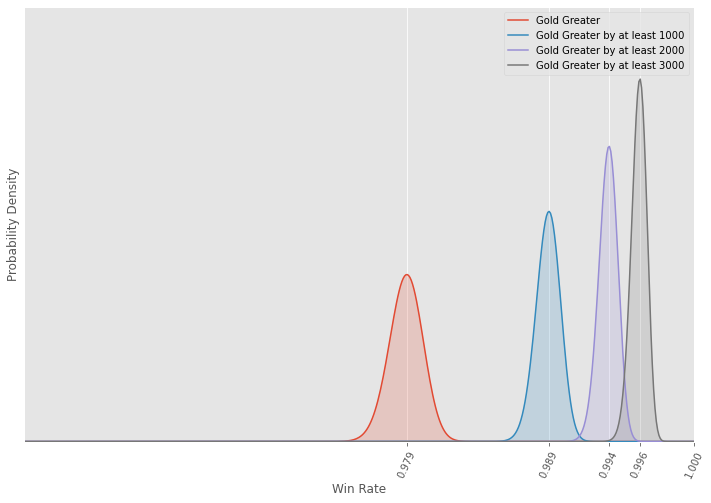

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot_beta_dist(a_samples, ax, label="Gold Greater", xlim=(0.95,1))
plot_beta_dist(b_samples, ax, label="Gold Greater by at least 1000", xlim=(0.95,1))
plot_beta_dist(c_samples, ax, label="Gold Greater by at least 2000", xlim=(0.95,1))
plot_beta_dist(d_samples, ax, label="Gold Greater by at least 3000", xlim=(0.95,1))
ax.legend()
ax.get_xaxis().set_ticks([0,np.mean(a_samples),np.mean(b_samples),np.mean(c_samples),np.mean(d_samples),1])
ax.tick_params(axis='x', rotation=65)
ax.set_xlim(0.95,1)

plt.savefig("gold_graph.png");

In [76]:
columns = ['blueWins','blueWardPlaced', 'redWardPlaced']
population = stats.norm(0.9, 0.6)
c_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 4)
d_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 6)
e_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 8)
f_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 10)
g_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 12)

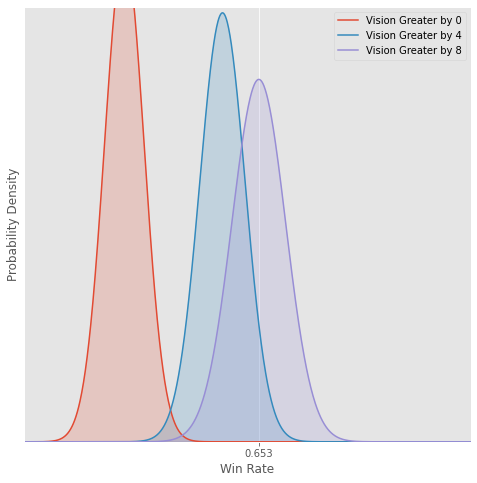

In [77]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
for i in range(0,9,4):
    a_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced',i)
    plot_beta_dist(a_vision_samples, ax, label=f"Vision Greater by {i}",xlim=(0.6,0.7))

ax.legend()

26904
26499


(array([3.500e+01, 8.900e+01, 1.750e+02, 8.630e+02, 9.000e+02, 1.219e+03,
        2.054e+03, 1.982e+03, 2.209e+03, 2.510e+03, 2.539e+03, 2.476e+03,
        2.280e+03, 2.087e+03, 1.678e+03, 1.220e+03, 8.260e+02, 4.970e+02,
        3.160e+02, 2.220e+02, 1.110e+02, 8.100e+01, 5.300e+01, 3.000e+01,
        1.700e+01, 1.200e+01, 1.000e+01, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([  8979. ,  12743.7,  16508.4,  20273.1,  24037.8,  27802.5,
         31567.2,  35331.9,  39096.6,  42861.3,  46626. ,  50390.7,
         54155.4,  57920.1,  61684.8,  65449.5,  69214.2,  72978.9,
         76743.6,  80508.3,  84273. ,  88037.7,  91802.4,  95567.1,
         99331.8, 103096.5, 106861.2, 110625.9, 114390.6, 118155.3,
        121920. ]),
 <a list of 30 Patch objects>)

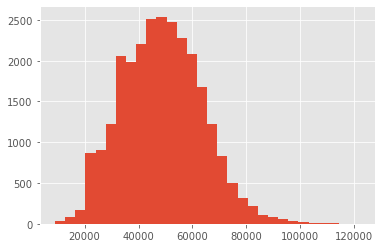

In [78]:
print(len(chall_df))
print(len(chall_df_clean))
plt.hist(chall_df_clean['blueTotalGold'], bins=30)

In [79]:
750/165

4.545454545454546

In [80]:
a_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced')
b_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 30)

In [81]:
num_simulations = 100_000

alpha, beta = get_beta_dist_params(a_vision_samples)[:2]
print(alpha, beta)
dist_A = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(b_vision_samples)[:2]
print(alpha, beta)
dist_B = stats.beta(alpha, beta)

simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)

print((simulated_B > simulated_A).mean())

7431 4508
331 238
0.0258


In [82]:
stats.beta(331, 238).ppf([0.025, .975])

array([0.54097099, 0.62192946])

In [83]:
stats.beta(7431, 4508).ppf([0.025, 0.975])

array([0.6136992 , 0.63108983])

In [147]:
vision_zero = chall_df_clean.copy()
vision_zero = vision_zero[vision_zero['blueVisionScore'] == 0]
vision_zero = vision_zero[vision_zero['redVisionScore'] == 0]
vision_zero

gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
284    4206501111         1118         1               1               1   
289    4204484753          967         1               0               0   
290    4204457873         1361         1               0               1   
430    4244743719         1836         0               0               0   
431    4244742882         1072         0               0               0   
...           ...          ...       ...             ...             ...   
26828  4111772817         1414         1               1               0   
26849  4176784999         1362         1               1               1   
26851  4056198775         1594         1               0               0   
26875  4172591385         1262         1               0               1   
26891  4211389100         1208         0               0               0   

       blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
284                 0                0                   1                0   
289                 0                0                   1                0   
290                 0                0                   1                0   
430                 0                0                   0                0   
431                 0                0                   0                0   
...               ...              ...                 ...              ...   
26828               0                0                   0                0   
26849               0                0                   0                0   
26851               0                0                   1                0   
26875               0                0                   0                0   
26891               0                0                   0                0   

       blueBaronKills  ...  redTotalMinionKills  redTotalLevel  redAvgLevel  \
284                 0  ...                  211             79         15.8   
289                 0  ...                  186             74         14.8   
290                 0  ...                  254             90         18.0   
430                 0  ...                  410             90         18.0   
431                 0  ...                  199             86         17.2   
...               ...  ...                  ...            ...          ...   
26828               0  ...                  300             90         18.0   
26849               0  ...                  290             90         18.0   
26851               0  ...                  343             90         18.0   
26875               0  ...                  222             89         17.8   
26891               0  ...                  299             89         17.8   

       redJungleMinionKills  redKillingSpree  redTotalHeal  \
284                       0                8          9837   
289                       0                9         27172   
290                       0               13         41164   
430                       0               18         56530   
431                       0               13         34551   
...                     ...              ...           ...   
26828                     0               10         34948   
26849                     0               12         28628   
26851                     0               12         35372   
26875                     0               13         25104   
26891                     0               10         28750   

       redObjectDamageDealt  blueVisionScore  redVisionScore  \
284                    2759                0               0   
289                    2728                0               0   
290                    4335                0               0   
430                    5254                0               0   
431                    5507                0               0   
...                     ...              ...             ...   
26828  

In [144]:
24693/26499

0.9318464847730104